In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os
import cv2
import tensorflow
import numpy as np
from keras import layers,models,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedShuffleSplit

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
catagory = ['Orange_bad','Orange_good']
train_set = []

def create_training_set():
    for j in catagory:
        label =  catagory.index(j)
        path = os.path.join('C:/Users/Admin/Downloads/old_oranges_data/train_set/',j)
        for img in os.listdir(path):
            try:
                # img_show = mpimg.imread(os.path.join(path,img))
                # gray_image = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)

                # chuyen grayscale va chinh kich co anh
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(32,32))
                #chuan hoa va chuyen sang 1D
                image_normalize = new_array /255.0
                train_set.append([image_normalize,label])
            except:
                pass

In [32]:
train_set.shape

AttributeError: 'list' object has no attribute 'shape'

In [3]:
create_training_set()

In [4]:
test_set = []

def create_testing_set():
    for j in catagory:
        label =  catagory.index(j)
        path = os.path.join('C:/Users/Admin/Downloads/old_oranges_data/test_set/',j)
        for img in os.listdir(path):
            try:
                # img_show = mpimg.imread(os.path.join(path,img))
                # gray_image = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)

                # chuyen grayscale va chinh kich co anh
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(32,32))
                #chuan hoa va chuyen sang 1D
                image_normalize = new_array /255.0
                test_set.append([image_normalize,label])
            except:
                pass

create_testing_set()

In [6]:
train_images = []
train_label = []
for block in train_set:
    train_images.append(block[0])
    train_label.append(block[1])

In [12]:
# lenoftrain = len(train_set)
# train_images= np.array(train_images).reshape(lenoftrain,-1)

In [7]:
test_images = []
test_label = []
for block in test_set:
    test_images.append(block[0])
    test_label.append(block[1])

In [37]:
train_images.shape

(2201, 32, 32, 3)

In [35]:
test_images.shape

(400, 32, 32, 3)

In [8]:
lenoftrain = len(train_set)
train_images= np.array(train_images)
train_label = np.array(train_label)

lenoftest = len(test_set)
test_images= np.array(test_images)
test_label = np.array(test_label)

In [306]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2)
for train_index, val_index in sss.split(train_images, train_label):
    X_train_split, X_val = train_images[train_index], train_images[val_index]
    y_train_split, y_val = train_label[train_index], train_label[val_index]

In [340]:
model2 = Sequential()

model2.add(layers.Conv2D(8, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Conv2D(16, (2, 2), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))
# Flatten the output and add dense layers
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(2, activation='sigmoid'))  

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0075), metrics=['accuracy'])

history2 = model2.fit(X_train_split, y_train_split, epochs=50, batch_size=64, callbacks=[early_stopping],validation_data=(X_val,y_val))

Epoch 1/50


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6279 - loss: 0.6328 - val_accuracy: 0.8957 - val_loss: 0.2664
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8451 - loss: 0.3541 - val_accuracy: 0.9184 - val_loss: 0.1753
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9323 - loss: 0.2041 - val_accuracy: 0.9116 - val_loss: 0.2205
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9518 - loss: 0.1512 - val_accuracy: 0.9773 - val_loss: 0.0672
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9686 - loss: 0.1099 - val_accuracy: 0.9841 - val_loss: 0.0414
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9769 - loss: 0.0650 - val_accuracy: 0.9773 - val_loss: 0.0485
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9774 - loss: 0.0701 - val_accuracy: 0.9796 - val_loss: 0.0713
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9782 - loss: 0.0696 - val_accuracy: 0.9615 - val_loss: 0.1175
Ep

In [341]:
pre = model2.predict(test_images)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [342]:
p2 = np.argmax(pre,axis=1)

In [343]:
testing = p2.tolist()

In [344]:
testing

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [345]:
acc = accuracy_score(test_label,p2)

In [346]:
acc

0.725

In [347]:
for j in catagory:
        label =  catagory.index(j)
        path = os.path.join('C:/Users/Admin/Downloads/old_oranges_data/test_set/',j)
        for img in os.listdir(path):
            try:
                  print(img)
            except:
                  pass

black_1276.jpg
black_1277.jpg
black_1278.jpg
black_1279.jpg
black_1280.jpg
black_1281.jpg
black_1282.jpg
black_1283.jpg
black_1284.jpg
black_1285.jpg
black_1286.jpg
black_1287.jpg
black_1288.jpg
black_1289.jpg
black_1290.jpg
black_1291.jpg
black_1292.jpg
black_1293.jpg
black_1294.jpg
black_1295.jpg
black_1296.jpg
black_1297.jpg
black_1298.jpg
black_1299.jpg
black_1300.jpg
black_1301.jpg
black_1302.jpg
black_1303.jpg
black_1304.jpg
black_1305.jpg
black_1306.jpg
black_1307.jpg
black_1308.jpg
black_1309.jpg
black_1310.jpg
black_1311.jpg
black_1312.jpg
black_1313.jpg
black_1314.jpg
black_1315.jpg
black_1316.jpg
black_1317.jpg
black_1318.jpg
black_1319.jpg
black_1320.jpg
black_1321.jpg
black_1322.jpg
black_1323.jpg
black_1324.jpg
black_1325.jpg
black_1326.jpg
black_1327.jpg
black_1328.jpg
black_1329.jpg
black_1330.jpg
black_1331.jpg
black_1332.jpg
black_1333.jpg
black_1334.jpg
black_1335.jpg
black_1336.jpg
black_1337.jpg
black_1338.jpg
black_1339.jpg
black_1340.jpg
black_1341.jpg
black_1342

In [348]:
submission = pd.DataFrame(columns=['image_name'])
for j in catagory:
        label =  catagory.index(j)
        path = os.path.join('C:/Users/Admin/Downloads/old_oranges_data/test_set/',j)
        for img in os.listdir(path):
            try:
                  df = pd.DataFrame({'image_name':[img]})
                  submission = pd.concat([submission,df])
            except:
                  pass

submission.insert(loc = len(submission.columns),column='label',value=testing)

In [349]:
submission.to_csv('submission')

13/13 - 0s - 5ms/step - accuracy: 0.7250 - loss: 0.9506


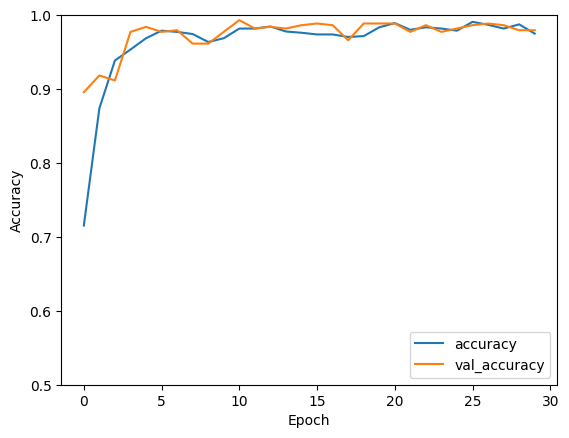

In [350]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images,  test_label, verbose=2)